In [1]:
import nltk
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import re

# from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

data = None
with open('sg_law_cleaned.txt', 'r', encoding='UTF-8') as data_file:
    data = data_file.read()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Filter out words that ends with symbols

def list_filter(x):
    blacklist = ['.', '-', ':']
    for c in blacklist:
        if c in x:
            return False
    result = re.compile('\\w+[^1-9\\.\\-\\s]').match(x)
    if result == None:
        return False
    # return True
    if result.start() == 0:
        return True
    return False

In [3]:
output = list(set(nltk.word_tokenize(data)))
output.sort()
word_list = output
word_list = list(filter(list_filter, word_list))
# display(word_list)

In [4]:
# TBC (Stemming)
stemmer = nltk.stem.snowball.SnowballStemmer('english')
stem = []
for word in word_list:
    stem.append(stemmer.stem(word))
# display(stem)

In [5]:
# Sentence Segmentation
sentences = nltk.sent_tokenize(data)
distribution = {
    'sentence_length': [],
    'num_sentences': []
}
for sentence in sentences:
    sentence_length = len(nltk.word_tokenize(sentence))
    index = None
    try:
        index = distribution['sentence_length'].index(sentence_length)
        distribution['num_sentences'][index] += 1
    except:
        distribution['sentence_length'].append(sentence_length)
        distribution['num_sentences'].append(1)        

In [6]:
distribution_tuples = []
for i in range(len(distribution['sentence_length'])):
    distribution_tuples.append((distribution['sentence_length'][i],distribution['num_sentences'][i]))
distribution_tuples.sort(key=lambda x: x[0])
# distribution_tuples

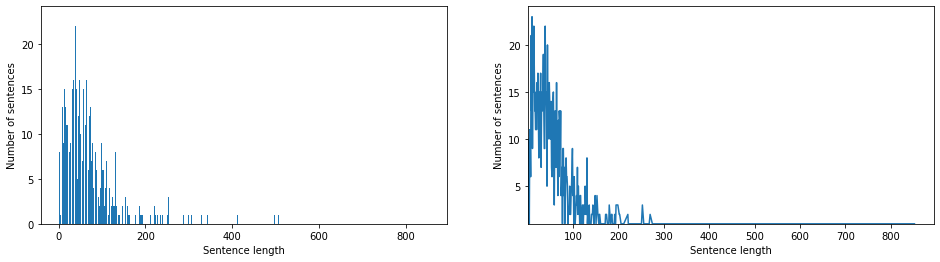

223


In [7]:
truncated_tuples = [m_tuple for m_tuple in distribution_tuples if m_tuple[1]]

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
# fig = plt.figure()
# plt.add_axes([0,0,1,1])
zipped = [*zip(*truncated_tuples)]
plt.bar(zipped[0],zipped[1])
plt.ylabel('Number of sentences')
plt.xlabel('Sentence length')
# plt.show()

plt.subplot(1,2,2)
# plt.figure()
plt.plot(*zip(*truncated_tuples))
# plt.margins(0)
plt.ylabel('Number of sentences')
plt.xlabel('Sentence length')
plt.ylim(ymin=1)
plt.xlim(xmin=1)
plt.show()

print(len(distribution_tuples))


In [8]:

# distribution_tuples
mydf = pd.DataFrame({"sentence_length":zipped[0], "no_sentences":zipped[1]})
mydf.describe()

,sentence_length,no_sentences
count,223.000000,223.000000
mean,146.147982,5.506726
std,138.408003,5.472182
min,2.000000,1.000000
25%,57.500000,1.000000
50%,113.000000,3.000000
75%,188.500000,9.000000
max,852.000000,23.000000


In [9]:
# POS Tagging
selected_sentences = random.sample(sentences, 3)
for sentence in selected_sentences:
    print(sentence)
    print(nltk.pos_tag(nltk.word_tokenize(sentence)))
    print()
    print()

Act 21 of 1973—Statutes of the Republic of Singapore (Miscellaneous Amendments) Act 1973Date of First Reading:7 March 1973(Bill No.
[('Act', 'NNP'), ('21', 'CD'), ('of', 'IN'), ('1973—Statutes', 'CD'), ('of', 'IN'), ('the', 'DT'), ('Republic', 'NNP'), ('of', 'IN'), ('Singapore', 'NNP'), ('(', '('), ('Miscellaneous', 'JJ'), ('Amendments', 'NNS'), (')', ')'), ('Act', 'NNP'), ('1973Date', 'CD'), ('of', 'IN'), ('First', 'NNP'), ('Reading:7', 'NNP'), ('March', 'NNP'), ('1973', 'CD'), ('(', '('), ('Bill', 'NNP'), ('No', 'NNP'), ('.', '.')]


(2)  The provisions set out in the Third Schedule shall apply to the corresponding specified security procedures.
[('(', '('), ('2', 'CD'), (')', ')'), ('The', 'DT'), ('provisions', 'NNS'), ('set', 'VBD'), ('out', 'RP'), ('in', 'IN'), ('the', 'DT'), ('Third', 'NNP'), ('Schedule', 'NNP'), ('shall', 'MD'), ('apply', 'VB'), ('to', 'TO'), ('the', 'DT'), ('corresponding', 'JJ'), ('specified', 'JJ'), ('security', 'NN'), ('procedures', 'NNS'), ('.', '.')]


(5)